In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

import my_functions_v13 as my
import importlib

from tqdm import tqdm
importlib.reload(my)

<module 'my_functions_v13' from '/Users/lucasumann/PycharmProjects/Masterarbeit/Notebooks/my_functions_v13.py'>

In [2]:
window_size_training = 0.1

In [3]:
number_factors = 3

In [4]:
full_coins_model = my.cond_auto_model(full_input = True, parallel_runs = 2, factor_dim=number_factors, model_name = "322 coins with intercept v13 training window "+str(window_size_training))
full_coins_model.test_percent = 1 - window_size_training

In [5]:
full_coins_model.initialize_X_Y()

In [6]:
variables = full_coins_model.X[0].columns[:-1]

In [7]:
variables

Index(['new_addresses', 'active_addresses', 'bm', 'volume',
       'standard deviation volume', 'size', 'illiq', 'capm beta', 'max',
       'capm alpha', 'ivol', 'turnover', 'rvol', 'bid-ask',
       'detrended turnover', 'standard deviation turnover', 'rel to high',
       'volume shock 30', 'volume shock 60', 'r2_1', 'r7_2', 'r13_2', 'r22_2',
       'r31_2', 'r30_14', 'r180_60', 'var_5', 'Intercept'],
      dtype='object')

In [ ]:
for variable in tqdm(variables):
    full_coins_model.make_contemporaneous_predictions(set_var_to_zero = variable)



In [9]:
results = {}

In [16]:
for variable in tqdm(variables[:-1]):
    full_coins_model.update_contemporaneous_Y_predictions(set_var_to_zero= variable)
    full_coins_model.reset_X_Y()
    full_coins_model.calculate_contemporaneous_r2()
    relevant_Rsquared_total = 1 - ((full_coins_model.masked_Y_pred_cont_average[-1194:] - full_coins_model.masked_Y_test[-1194:])**2).sum().sum() / (full_coins_model.masked_Y_test[-1194:]**2).sum().sum()
    results[variable] = {"masked Rsquared total" : relevant_Rsquared_total}


100%|██████████| 27/27 [00:17<00:00,  1.57it/s]


In [17]:
print(results)

{'new_addresses': {'masked Rsquared total': 0.24097227478140282}, 'active_addresses': {'masked Rsquared total': 0.24096502477984982}, 'bm': {'masked Rsquared total': 0.24071768300253304}, 'volume': {'masked Rsquared total': 0.24052343527390274}, 'standard deviation volume': {'masked Rsquared total': 0.24046301129985448}, 'size': {'masked Rsquared total': 0.24018469837812917}, 'illiq': {'masked Rsquared total': 0.23949609243474212}, 'capm beta': {'masked Rsquared total': 0.23951051912859123}, 'max': {'masked Rsquared total': 0.23987371498789334}, 'capm alpha': {'masked Rsquared total': 0.24120357183523955}, 'ivol': {'masked Rsquared total': 0.2413096278686887}, 'turnover': {'masked Rsquared total': 0.2412621982843547}, 'rvol': {'masked Rsquared total': 0.24123224222107165}, 'bid-ask': {'masked Rsquared total': 0.23902319022205865}, 'detrended turnover': {'masked Rsquared total': 0.2390554893038438}, 'standard deviation turnover': {'masked Rsquared total': 0.23904922699013564}, 'rel to h

<AxesSubplot:xlabel='Variable', ylabel='Relevant Rsquared total'>

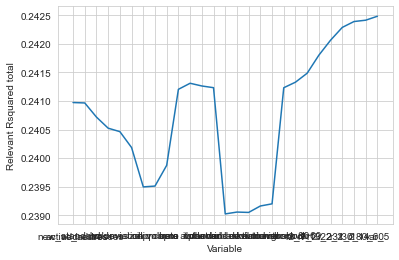

In [22]:
results_df = pd.DataFrame({"Variable": results.keys(), "Relevant Rsquared total": [value["masked Rsquared total"] for value in results.values()]})
sns.lineplot(data=results_df, x="Variable", y="Relevant Rsquared total")

In [19]:
import seaborn as sns